<a href="https://colab.research.google.com/github/FelipeMu/memoria2024-testing/blob/main/test1_signalsv4-getting-min-error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conexión a Google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de archivo
 Se procede a leer el archivo con extensión '.csv' - señal de PAM y VFSC (sujeto G1)

In [9]:
import csv
import numpy as np

# Arreglo para almcenar los datos de las senales
G1_PAM = [] # PAM: Presión Arterial Media
G1_VSC = [] # VSC: Velocidad Sanguínea Cerebral

# Abre el archivo CSV en modo lectura
with open('/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/G2_001.csv', newline='') as csvfile:
    # Lee el archivo CSV usando el lector CSV
    csv_reader = csv.reader(csvfile)

    # Itera sobre cada fila en el archivo CSV
    for row in csv_reader:
        # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
        G1_PAM.append(row[0])
        G1_VSC.append(row[1])
#Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
del G1_PAM[0]
del G1_VSC[0]

G1_PAM = np.array(G1_PAM)
G1_PAM = G1_PAM.astype(np.float64)


# Preprocesamiento
Se analizan los datos del archivo '.csv' antes de los respectivos análisis

In [10]:
# Se procede a realizar preprocesamiento de los datos a estudiar

# Se analizan si tienen el mismo largo ambos arreglos de la senal G1
len_distinto = False
if len(G1_PAM) != len(G1_VSC):
  len_distinto = True
  print('Arreglos PAM y VSC con distinto largo.\n')


# Verificacion de valores nulos:
i = 0
vacios_PAM = 0
vacios_VSC = 0
while (i < len(G1_PAM)):
  if G1_PAM[i] == '':
    vacios_PAM = vacios_PAM + 1
  if G1_VSC[i] == '':
    vacios_VSC = vacios_VSC + 1
  i = i + 1
# Revision de valores nulos en el arreglo de la senal PAM
if vacios_PAM != 0:
  print('Arreglo señal PAM con ', vacios_PAM, 'vacíos.\n')
# Revision de valores nulos en el arreglo de la senal VSC
if vacios_VSC != 0:
  print('Arreglo señal VSC con ', vacios_VSC, 'vacíos.\n')


# Aplicación de la transformada Wavelet
**¿Que realiza la T.Wavelet?**
La transformación de la WT se realiza a través de una función llamada wavelet (o wavelet madre), con la que se descompone una señal en diferentes componentes de frecuencia que conforman una familia de funciones que son traslaciones y dilataciones de una función madre ψ (t). Este proceso de traslación y dilatación.



Se estudia cúal de las familias de la T.Wavelets (Wavelets families) es la que genera menor error al aplicar su T. wavelet inversa
inf: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html

**Información de las familias de Wavelets**
La calidad de la información obtenida a partir de un análisis donde se aplica la WT depende en gran medida de la wavelet madre utilizada, de modo que se debe considerar como una "*etapa dentro del análisis*" la selección de una wavelet madre adecuada para cada caso particular de estudio (Gómez etc al., 2013)

**Dado la naturaleza de los datos es utilizará la CWN (Continuous Wavelet Transform).**

**A considerar:**


1.   Longitud de los filtros (Capacidad de capturar detalles finos vs Complejidad computacional)



**A considerar:**
1.   plt.imshow() se utiliza para mostrar la matriz de coeficientes de la CWT como *una imagen*.
2.   La función np.abs() se usa para tomar el valor absoluto de los coeficientes para la visualización.
3.   El argumento cmap='jet' define el mapa de colores que se utilizará para representar la amplitud de los coeficientes.
4.  **Al no tener definida una función de escala, una wavelet determinada no puede ser utilizada en la aplicación de la DWT**

    *   wavelets madres que tienen una función escala definida y por lo tanto es aplicable la "DWT":


1.   Haar (harr)
2.   Daubechies (db)
3.   Symmlets (symN)
4.   Coiflets (coifN)
5.   Biorthogonal (BiorNr.Nd)
6.   Reverse Biorthogonal (rBiorNR.Nd)
7.   Discrete Meyer (dmey)






6.   **coef_approx:** Estos coeficientes capturan las tendencias generales y las componentes de baja frecuencia de la señal.
6.   **coef_details:** Estos coeficientes capturan cambios rápidos o detalles finos en la señal que pueden perderse en la aproximación

(por cada nivel de descomposición se genera un conjunto de coeficientes de aproximación y detalles)

**Desvanecimiento y tamaño de soporte:**
 La propiedad de desvanecimiento dicta que a medida que la frecuencia de una wavelet aumenta, su amplitud disminuye. Esta propiedad está estrechamente relacionada con el soporte de la wavelet. Cuanto más corto sea el soporte de una wavelet en el dominio del tiempo, mayor será su ancho de banda en el dominio de la frecuencia, lo que significa que cubrirá un rango más amplio de frecuencias.

In [ ]:
import pywt

pywt.families()

# Obtener una lista completa de cada familia Wavelets
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))



In [25]:
# ***************************TESTING**********************************

# version3.0
import pywt
import numpy as np
import matplotlib.pyplot as plt

# 1. ver que wavelet es la que presenta un menor RMSE
# 2. hacer funcion que lea el archivo y cree un diccionario con los archivos encontrados (datos a alamacenar, nombre file,
#    senal original, senal reconstruida, error RMSE)

#estos son las wavelets a utilizar:

#Haar (harr) discrete_families[0]
#Daubechies (db) discrete_families[1]
#Symmlets (symN) discrete_families[2]
#Coiflets (coifN) discrete_families[3]
#Biorthogonal (BiorNr.Nd) discrete_families[4]
#Reverse Biorthogonal (rBiorNR.Nd) discrete_families[5]
#Discrete Meyer (dmey) discrete_families[6]

discrete_families = []
for family in pywt.families():
    discrete_families.append(pywt.wavelist(family))
#Se almacenan solo las familias waveletes discretas que se utilizaran en un arreglo llamado discrete_families
discrete_families = discrete_families[0:7]



# Definir la familia de wavelets y el nivel de descomposicion
# Nombre de funcion: apply_wavelet()
# Descripcion: funcion encargada de aplicar la T.wavelet y T.wavelet inversa discreta
#              a la senal que se esta analizando.
# Entrada:
#   wavelet: es un hijo de de las wavelets madres que funcionan con la DWT
# Salida: -
def apply_wavelet (wavelet):
  level = 1
  # Aplicar la transformada wavelet discreta
  # **Lo normal es primero tener el cA1 y luego el cD1, el coef de aproximacion suele ser parecido a la senal y esta primero**
  coefficients = pywt.wavedec(G1_PAM, wavelet, level=level)
  # Reconstruir la senal a partir de los coeficientes
  reconstructed_signal = pywt.waverec(coefficients, wavelet)
  return reconstructed_signal


def get_rmse(original_signal, predict_signal):
  # Calcular el error absoluto entre la señal original y la reconstruida
  absolute_error = np.abs(original_signal - predict_signal)

  # Calcular el error cuadrático
  squared_error = (original_signal - predict_signal) ** 2

  # Calcular la media del error cuadrático
  mean_squared_error = np.mean(squared_error)

  # Calcular la raíz cuadrada de la media del error cuadrático (RMSE)
  rmse = np.sqrt(mean_squared_error)
  return rmse


# Nombre de funcion: show_signals()
# Descripcion: funcion encargada de mostrar como grafico la senal original y la
#              la senal reconstruida obtenida de la wavelet inversa.
# Entrada:
#   OriginalPam: senal PAM original
#   PredictPam: senal PAM reconstruida
# Salida: -
def show_signals (OriginalPam, PredictPam):
  # Graficar ambas señales
  plt.figure(figsize=(10, 5))
  plt.plot(OriginalPam, label='Señal Original', color='blue', marker='o')
  plt.plot(PredictPam, label='Señal Reconstruida', color='red', marker='x')
  plt.title('Señal PAM Original vs Señal PAM Reconstruida')
  plt.ylabel('Niveles CO2')
  plt.xlabel('Tiempo')
  plt.legend()
  plt.grid(True)
  plt.show()


wavelets_discretes = []
# Estructura del arreglo de diccionarios wavelets_discretes:
#   *familiy_wavelet (tipo de dato: string]: corresponde a un hijo de una wavelet madre discreta
#   *signal_rec (tipo de dato: array): corresponde a la senal reconstruida a partir de la aplicacion
#               de la T.wavelet inversa.
#   *error_wavelet (tipo de dato: float): corresponde al error RMSE. error promedio entre la senal
#                                        original y la senal reconstruida.


for family in discrete_families:
  for children in family:
    dicc_aux = {}
    # se aplican todos los hijos de la wavelet madre
    dicc_aux['family_wavelet'] = children
    # se aplica la T.wavelet y la T.wavelet inversa
    dicc_aux['signal_rec'] = apply_wavelet(children)
    # se obtiene el error RMSE
    dicc_aux['error_wavelet'] = get_rmse(G1_PAM, dicc_aux['signal_rec'])
    # se agrega todo lo calculado en el arreglo dicc_discrete en forma de diccionario
    wavelets_discretes.append(dicc_aux)

print(wavelets_discretes)

[{'family_wavelet': 'haar', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.9275558140643224e-14}, {'family_wavelet': 'db1', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.9275558140643224e-14}, {'family_wavelet': 'db2', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.6166906431594088e-14}, {'family_wavelet': 'db3', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.4921714937636202e-14}, {'family_wavelet': 'db4', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.70511206115227e-14}, {'family_wavelet': 'db5', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.676291189834734e-14}, {'family_wavelet': 'db6', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.7728291970782124

# Selección de la mejor Wavelet madre
Se procede a mostrar todos los errores RMSE calculados en un grafico general y se selecciona la wavelet que presente el mínimo error.

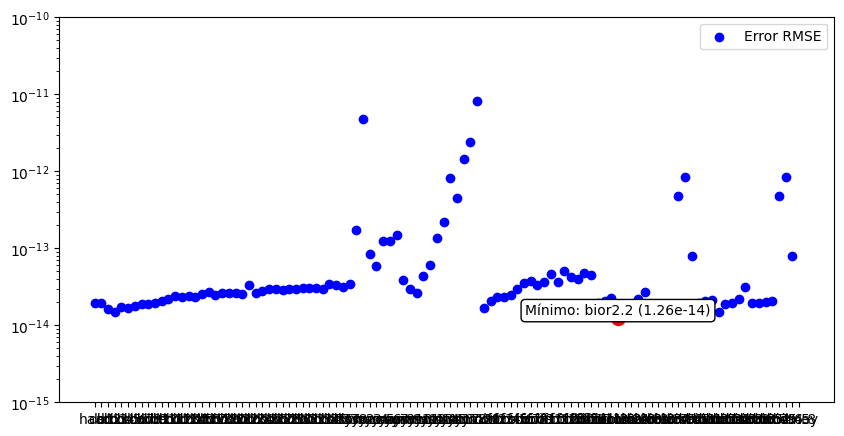

In [32]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import interactive

# ... (código anterior) ...

# Extraer errores
errors = []
for dicc in wavelets_discretes:
  errors.append(dicc['error_wavelet'])

# Extraer nombres de wavelets
wavelets_names = []
for dicc in wavelets_discretes:
  wavelets_names.append(dicc['family_wavelet'])

# Implementar zoom interactivo
interactive(True)

# Ajustar tamaño de la imagen
plt.figure(figsize=(10, 5))

# Crear el gráfico de puntos
plt.scatter(wavelets_names, errors, c='b')

# Calcular el error mínimo
min_error = np.min(errors)

# Encontrar el índice del error mínimo
min_error_index = np.argmin(errors)

# Resaltar el error mínimo
plt.scatter(wavelets_names[min_error_index], errors[min_error_index], c='r', s=100)

# Ajustar el eje Y
plt.ylim([1e-15, 1e-10])
plt.yscale('log', base=10)

# Añadir etiquetas a los puntos
# ... (código de etiquetas, si lo deseas) ...

# Mostrar leyenda
plt.legend(['Error RMSE'])

# Agregar anotación para el error mínimo
min_error_wavelet = wavelets_names[min_error_index]
plt.annotate(f"Mínimo: {min_error_wavelet} ({min_error:.2e})", (min_error_wavelet, errors[min_error_index]),
             bbox=dict(boxstyle="round", fc="w"), ha="center", va="bottom")

# Añadir etiquetas a los puntos (en caso de querer ver error es de de determinada wavelt)
#for i, wavelet in enumerate(wavelets_names):
#    plt.annotate(wavelet, (wavelets_names[i], errors[i]))


plt.show()